Tabela przepływów pieniężnych:
+----+--------+-------------+------------+------------+------------+------------+-----------------+------------------------+
|    |   Year | Revenue     | Costs      | CAPEX      | EBT        | Taxes      | Net Cash Flow   | Cumulative Cash Flow   |
|----+--------+-------------+------------+------------+------------+------------+-----------------+------------------------|
|  0 |      1 | $100,000.00 | $60,000.00 | $15,000.00 | $25,000.00 | $6,250.00  | $18,750.00      | $18,750.00             |
|  1 |      2 | $105,000.00 | $61,800.00 | $15,300.00 | $27,900.00 | $6,975.00  | $20,925.00      | $39,675.00             |
|  2 |      3 | $110,250.00 | $63,654.00 | $15,606.00 | $30,990.00 | $7,747.50  | $23,242.50      | $62,917.50             |
|  3 |      4 | $115,762.50 | $65,563.62 | $15,918.12 | $34,280.76 | $8,570.19  | $25,710.57      | $88,628.07             |
|  4 |      5 | $121,550.63 | $67,530.53 | $16,236.48 | $37,783.61 | $9,445.90  | $28,337.71  

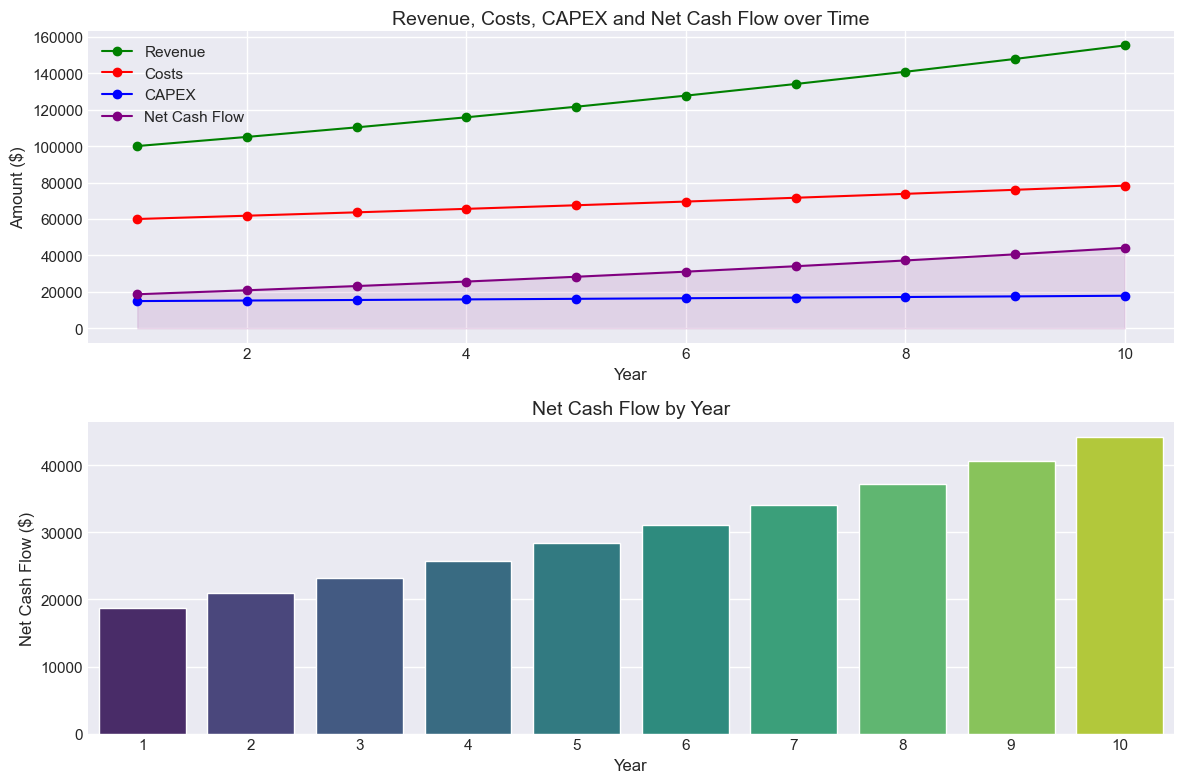

In [12]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # Biblioteka do ładnego wyświetlania tabel

# Ustawienia estetyczne dla wykresów
sns.set(style="whitegrid")
plt.style.use("seaborn-darkgrid")

# Parametry modelu
years = 10  # liczba lat
revenue_growth = 0.05  # roczny wzrost przychodów (5%)
initial_revenue = 100000  # początkowe przychody
initial_costs = 60000  # początkowe koszty operacyjne
cost_growth = 0.03  # roczny wzrost kosztów (3%)
tax_rate = 0.25  # stawka podatkowa (25%)
initial_capex = 15000  # inwestycje kapitałowe (CAPEX)
capex_growth = 0.02  # roczny wzrost CAPEX (2%)
discount_rate = 0.1  # stopa dyskontowa (10%)

# Tworzenie tabeli przepływów pieniężnych
cash_flows = []
revenues = []
costs = []
capex_list = []
taxes = []
cumulative_cash_flow = 0
cumulative_cash_flows = []  # Lista kumulatywnych przepływów pieniężnych

for year in range(1, years + 1):
    # Obliczanie przychodów i kosztów
    revenue = initial_revenue * (1 + revenue_growth) ** (year - 1)
    cost = initial_costs * (1 + cost_growth) ** (year - 1)
    
    # Inwestycje kapitałowe
    capex = initial_capex * (1 + capex_growth) ** (year - 1)
    
    # Zysk przed opodatkowaniem
    ebt = revenue - cost - capex
    
    # Podatek
    tax = ebt * tax_rate if ebt > 0 else 0
    
    # Przepływy pieniężne netto
    net_cash_flow = ebt - tax
    cash_flows.append(net_cash_flow)
    
    # Kumulatywne przepływy pieniężne
    cumulative_cash_flow += net_cash_flow
    cumulative_cash_flows.append(cumulative_cash_flow)
    
    # Zapisywanie wartości do list
    revenues.append(revenue)
    costs.append(cost)
    capex_list.append(capex)
    taxes.append(tax)

# Tworzenie DataFrame do przejrzystej prezentacji
df = pd.DataFrame({
    'Year': np.arange(1, years + 1),
    'Revenue': revenues,
    'Costs': costs,
    'CAPEX': capex_list,
    'EBT': np.array(revenues) - np.array(costs) - np.array(capex_list),
    'Taxes': taxes,
    'Net Cash Flow': cash_flows,
    'Cumulative Cash Flow': cumulative_cash_flows  # Nowa kolumna dla kumulatywnych przepływów
})

# Obliczanie wartości bieżącej netto (NPV)
discount_factors = [(1 / (1 + discount_rate) ** year) for year in range(1, years + 1)]
npv = np.sum(np.array(cash_flows) * np.array(discount_factors))

# Obliczanie wewnętrznej stopy zwrotu (IRR) za pomocą numpy_financial
irr = npf.irr(cash_flows)

# Formatowanie tabeli i wyświetlanie wyników w czytelny sposób
print("Tabela przepływów pieniężnych:")
table = df.copy()
table[['Revenue', 'Costs', 'CAPEX', 'EBT', 'Taxes', 'Net Cash Flow', 'Cumulative Cash Flow']] = \
    table[['Revenue', 'Costs', 'CAPEX', 'EBT', 'Taxes', 'Net Cash Flow', 'Cumulative Cash Flow']].applymap(lambda x: f"${x:,.2f}")
print(tabulate(table, headers='keys', tablefmt='psql'))

print(f"\nNPV (Net Present Value): ${npv:,.2f}")
print(f"IRR (Internal Rate of Return): {irr:.2%}")

# Wizualizacje
plt.figure(figsize=(12, 8))

# Wykres przychodów, kosztów, CAPEX i przepływów pieniężnych
plt.subplot(2, 1, 1)
plt.plot(df['Year'], df['Revenue'], label='Revenue', marker='o', color='green')
plt.plot(df['Year'], df['Costs'], label='Costs', marker='o', color='red')
plt.plot(df['Year'], df['CAPEX'], label='CAPEX', marker='o', color='blue')
plt.plot(df['Year'], df['Net Cash Flow'], label='Net Cash Flow', marker='o', color='purple')
plt.fill_between(df['Year'], df['Net Cash Flow'], color='purple', alpha=0.1)

plt.title('Revenue, Costs, CAPEX and Net Cash Flow over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)

# Wykres słupkowy przepływów pieniężnych netto
plt.subplot(2, 1, 2)
sns.barplot(x='Year', y='Net Cash Flow', data=df, palette='viridis')
plt.title('Net Cash Flow by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Net Cash Flow ($)')
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


Tabela przepływów pieniężnych:
+----+--------+-------------+------------+------------+------------+------------+-----------------+------------------------+
|    |   Year | Revenue     | Costs      | CAPEX      | EBT        | Taxes      | Net Cash Flow   | Cumulative Cash Flow   |
|----+--------+-------------+------------+------------+------------+------------+-----------------+------------------------|
|  0 |      1 | $100,000.00 | $60,000.00 | $15,000.00 | $25,000.00 | $6,250.00  | $18,750.00      | $18,750.00             |
|  1 |      2 | $105,000.00 | $61,800.00 | $15,300.00 | $27,900.00 | $6,975.00  | $20,925.00      | $39,675.00             |
|  2 |      3 | $110,250.00 | $63,654.00 | $15,606.00 | $30,990.00 | $7,747.50  | $23,242.50      | $62,917.50             |
|  3 |      4 | $115,762.50 | $65,563.62 | $15,918.12 | $34,280.76 | $8,570.19  | $25,710.57      | $88,628.07             |
|  4 |      5 | $121,550.63 | $67,530.53 | $16,236.48 | $37,783.61 | $9,445.90  | $28,337.71  

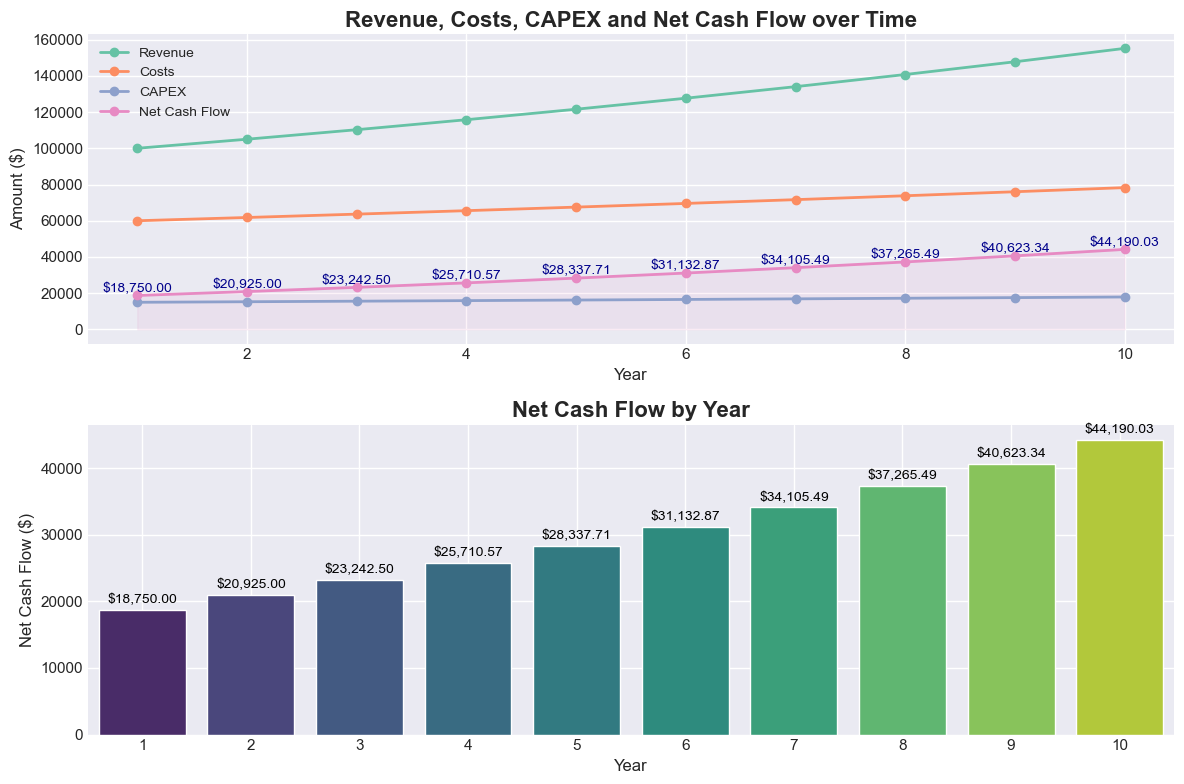

In [13]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Ustawienia estetyczne dla wykresów
sns.set(style="whitegrid")
plt.style.use("seaborn-darkgrid")
colors = sns.color_palette("Set2")  # Paleta nowoczesnych kolorów

# Parametry modelu
years = 10  # liczba lat
revenue_growth = 0.05  # roczny wzrost przychodów (5%)
initial_revenue = 100000  # początkowe przychody
initial_costs = 60000  # początkowe koszty operacyjne
cost_growth = 0.03  # roczny wzrost kosztów (3%)
tax_rate = 0.25  # stawka podatkowa (25%)
initial_capex = 15000  # inwestycje kapitałowe (CAPEX)
capex_growth = 0.02  # roczny wzrost CAPEX (2%)
discount_rate = 0.1  # stopa dyskontowa (10%)

# Tworzenie tabeli przepływów pieniężnych
cash_flows = []
revenues = []
costs = []
capex_list = []
taxes = []
cumulative_cash_flow = 0
cumulative_cash_flows = []  # Lista kumulatywnych przepływów pieniężnych

for year in range(1, years + 1):
    # Obliczanie przychodów i kosztów
    revenue = initial_revenue * (1 + revenue_growth) ** (year - 1)
    cost = initial_costs * (1 + cost_growth) ** (year - 1)
    
    # Inwestycje kapitałowe
    capex = initial_capex * (1 + capex_growth) ** (year - 1)
    
    # Zysk przed opodatkowaniem
    ebt = revenue - cost - capex
    
    # Podatek
    tax = ebt * tax_rate if ebt > 0 else 0
    
    # Przepływy pieniężne netto
    net_cash_flow = ebt - tax
    cash_flows.append(net_cash_flow)
    
    # Kumulatywne przepływy pieniężne
    cumulative_cash_flow += net_cash_flow
    cumulative_cash_flows.append(cumulative_cash_flow)
    
    # Zapisywanie wartości do list
    revenues.append(revenue)
    costs.append(cost)
    capex_list.append(capex)
    taxes.append(tax)

# Tworzenie DataFrame do przejrzystej prezentacji
df = pd.DataFrame({
    'Year': np.arange(1, years + 1),
    'Revenue': revenues,
    'Costs': costs,
    'CAPEX': capex_list,
    'EBT': np.array(revenues) - np.array(costs) - np.array(capex_list),
    'Taxes': taxes,
    'Net Cash Flow': cash_flows,
    'Cumulative Cash Flow': cumulative_cash_flows  # Nowa kolumna dla kumulatywnych przepływów
})

# Obliczanie wartości bieżącej netto (NPV)
discount_factors = [(1 / (1 + discount_rate) ** year) for year in range(1, years + 1)]
npv = np.sum(np.array(cash_flows) * np.array(discount_factors))

# Obliczanie wewnętrznej stopy zwrotu (IRR) za pomocą numpy_financial
irr = npf.irr(cash_flows)

# Formatowanie tabeli i wyświetlanie wyników w czytelny sposób
print("Tabela przepływów pieniężnych:")
table = df.copy()
table[['Revenue', 'Costs', 'CAPEX', 'EBT', 'Taxes', 'Net Cash Flow', 'Cumulative Cash Flow']] = \
    table[['Revenue', 'Costs', 'CAPEX', 'EBT', 'Taxes', 'Net Cash Flow', 'Cumulative Cash Flow']].applymap(lambda x: f"${x:,.2f}")
print(tabulate(table, headers='keys', tablefmt='psql'))

print(f"\nNPV (Net Present Value): ${npv:,.2f}")
print(f"IRR (Internal Rate of Return): {irr:.2%}")

# Wizualizacje
plt.figure(figsize=(12, 8))

# Wykres przychodów, kosztów, CAPEX i przepływów pieniężnych
plt.subplot(2, 1, 1)
plt.plot(df['Year'], df['Revenue'], label='Revenue', marker='o', color=colors[0], linewidth=2)
plt.plot(df['Year'], df['Costs'], label='Costs', marker='o', color=colors[1], linewidth=2)
plt.plot(df['Year'], df['CAPEX'], label='CAPEX', marker='o', color=colors[2], linewidth=2)
plt.plot(df['Year'], df['Net Cash Flow'], label='Net Cash Flow', marker='o', color=colors[3], linewidth=2)
plt.fill_between(df['Year'], df['Net Cash Flow'], color=colors[3], alpha=0.1)

# Dodanie opisu narracyjnego
for i in range(len(df['Year'])):
    plt.text(df['Year'][i], df['Net Cash Flow'][i] + 2000, f"${df['Net Cash Flow'][i]:,.2f}", 
             horizontalalignment='center', fontsize=10, color='darkblue')

# Tytuł i osie
plt.title('Revenue, Costs, CAPEX and Net Cash Flow over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Wykres słupkowy przepływów pieniężnych netto
plt.subplot(2, 1, 2)
sns.barplot(x='Year', y='Net Cash Flow', data=df, palette='viridis')

# Dodanie opisu narracyjnego do wykresu słupkowego
for i in range(len(df['Year'])):
    plt.text(i, df['Net Cash Flow'][i] + 1000, f"${df['Net Cash Flow'][i]:,.2f}", 
             horizontalalignment='center', fontsize=10, color='black')

plt.title('Net Cash Flow by Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Cash Flow ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


In [14]:
print("Przepływy pieniężne:", cash_flows)


Przepływy pieniężne: [18750.0, 20925.0, 23242.5, 25710.570000000014, 28337.710500000016, 31132.874808000022, 34105.492486350035, 37265.49399404523, 40623.336585461504, 44190.03152907168]
